### 데이터 시각화 패키지 맥플롯리브
matplotlib 패키지는 파이썬에서 데이터를 차트 혹은 플롯으로 시각화하는 패키지
- 선형 그래프 (live plot)
- 점 그래프 (scatter plot)
- 등고선 (contour plot)
- 표면도 (surface plot)
- 막대그래프 (bar chart)
- 히스토그램 (histogram)
- 박스 그래프 (box plot)

#### pyplot 하위 패키지
간단한 시각화 자료를 만들때 사용되는 matplotlib 의 하위 패키지  
matplotlib 패키지를 직접 사용하지 않고 단순히 pyplot 만으로 시각화를 할 수 있음

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
%matplotlib inline

In [10]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe=fm.FontEntry(
    fname=r'font/NanumGothic.ttf',          # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

#pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.size': 14, 'font.family': 'NanumGothic'})

#pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

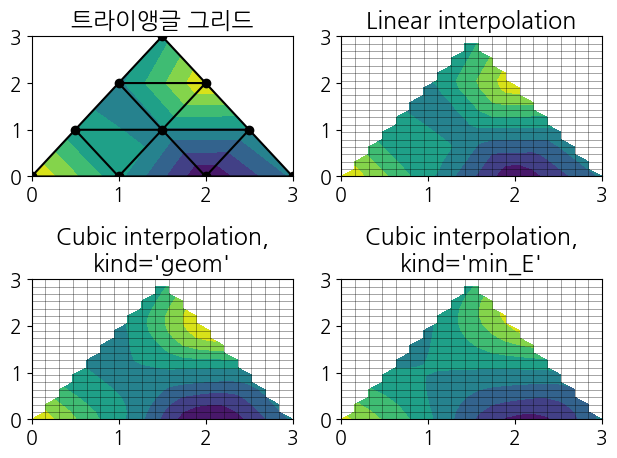

In [11]:
"""
Interpolation from triangular grid to quad grid.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5*x)*np.cos(1.5*y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)


# Plot the triangulation.
plt.subplot(221)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.title('트라이앵글 그리드')

# Plot linear interpolation to quad grid.
plt.subplot(222)
plt.contourf(xi, yi, zi_lin)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
plt.subplot(223)
plt.contourf(xi, yi, zi_cubic_geom)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
plt.subplot(224)
plt.contourf(xi, yi, zi_cubic_min_E)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='min_E'")

plt.tight_layout()
plt.show()